<a href="https://colab.research.google.com/github/victoria2012/test_deeplearning/blob/master/single_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import tensorflow as tf

!python -m pip install -U tensorflow : 주피터노트북에서 쓸 때는 설치해야 한다. 설치방법

In [31]:
tf.__version__

'2.5.0'

In [32]:
x_data = [[0,0],
          [1,0],
          [0,1],
          [1,1]]
y_data = [[0],   # 0.232 -> 23.2%, 0.982 -> 98.2% 
          [1],
          [1],
          [1]]
type(x_train), type(y_train) 

(numpy.ndarray, numpy.ndarray)

list는 딥러닝에 넣을 수 없다. 그래서 넘파이로 바꿔줘야 한다. 

In [33]:
import numpy as np
x_train = np.array(x_data)
y_train = np.array(y_data)
x_train.shape, y_train.shape

((4, 2), (4, 1))

이제 모델을 만들어줘야 한다. 분류에서는 데이터의 틀을 보고 입력될 때는 컬럼의 갯수를 알 수 있고 의견을 낼 때는 y의 유티크한 값을 알 수 있다. 딥러닝에서는 사용자가 인풋과 아웃풋의 갯수를 넣어줘야 한다. 부페에서 음식을 가져올 때는 맨먼저 접시를 들듯이 딥러닝에서는 모델을 구성하는 그릇, 즉 시퀀스를 먼저 만들어줘야 한다. (keras에 있는 것을 사용)


Input 넣기, output 넣기 ==> 교육

In [35]:
model = tf.keras.models.Sequential()                  # 조절해 쓰기위해 변수에 담는다. 
model.add(tf.keras.Input(shape=(2,)))                      # 모델에 담는다. add    # 경로가 중요하다.   shape 다음에는 넣는 갯수를 의미. shape에서 열의 갯수를 찾아야 한다. 2는 인풋의 열의 갯수, 1은 아웃풋의 열의 갯수
model.add(tf.keras.layers.Dense(1))                      # 기능을 넣어줘야 한다. 덴스를 몇 개 쓰는 것인지 넣어줘야 한다.        #layers에 많은 기능이 들어가 있다. 덴스도 그 중의 하나. 
model.compile(optimizer='sgd', loss='mse')                           # 부페로 비유하면 음식을 가져와서 포크로 먹을건지 젓가락으로 먹을 건지 등 도구를 사용하는 것을 결정하는 것, optimizer와 loss가 도구임. 컴퓨터는 도구를 가지고 찔러보는 것
                                                                      # loss는 중앙값이냐 사이드값이냐를 알려주는 것. optimizer는 찔러보는 횟수

In [36]:
                                   # units가 아웃풋으로 나오는 것. 덴스가 아웃풋까지 함께 묶여 있다. 이것이 하나의 덴스

In [44]:
model.fit(x_train, y_train, epochs=500)                 # model에 수학공식이 들어가 있음

Epoch 1/500
1/1 [==============================] - 0s 4ms/step - loss: 0.3975
Epoch 2/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3894
Epoch 3/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3818
Epoch 4/500
1/1 [==============================] - 0s 4ms/step - loss: 0.3745
Epoch 5/500
1/1 [==============================] - 0s 5ms/step - loss: 0.3676
Epoch 6/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3611
Epoch 7/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3548
Epoch 8/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3489
Epoch 9/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3432
Epoch 10/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3378
Epoch 11/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3327
Epoch 12/500
1/1 [==============================] - 0s 4ms/step - loss: 0.3277
Epoch 13/500
1/1 [==============================] - 0s 4ms/st

In [41]:
model.predict([[0,1]])    # epoch = 1                

array([[-0.16865121]], dtype=float32)

In [43]:
model.predict([[0,1]])    # epoch = 50 

array([[0.9408977]], dtype=float32)

In [45]:
model.predict([[0,1]])    # epoch = 500

array([[0.8032337]], dtype=float32)

In [38]:
model.get_weights()

[array([[-1.2172362 ],
        [-0.19822441]], dtype=float32), array([0.0295732], dtype=float32)]

위 숫자가 x의 계수, y의 절편임. y = ax +bx + c
즉, y = -1.2172362x + -0.19822441x + 0.0295732

머신러닝의 co-efficient가 weight,  인터셉트가 바이어스임.

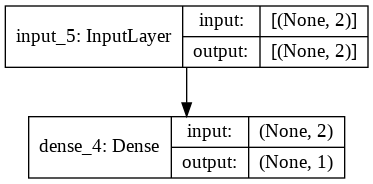

In [40]:
tf.keras.utils.plot_model(model, show_shapes=True)

딥러닝은 하나 하나 선언하는 것이 완전체다. 위에서 input만 선언해주었지만 아래에서 output까지 나온 것을 보면 알 수 있음